# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'citipy'

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

NameError: name 'citipy' is not defined

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Print that data retrieval has begun
print('Beginning Data Retrieval')
print('-----------------------------')

# Set record_num and set_num equal to zero, to count the city in loop
record_num = 1
set_num = 1

# Create empty lists to hold desired data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
city_lat = []
city_lon = []
max_temp = []
wind_speed = []

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Loop through each city, make API calls for each city
for city in cities:
    
    city = city
    
    # Build query URL
    #units = imperial for tempertature in F, wind speed in mph
    query_url = url + "appid=" + api_key + "&q=" + city + '&units=imperial'
    weather_response = requests.get(query_url)
    
    # Account for errors, skip the cities that produce errors
    if weather_response.ok == False:
        print("City not found. Skipping...")
    else:
        print(f'Processing Record {record_num} of Set {set_num} | {city}')
        weather_json = weather_response.json()

        # Append desired data to respective list
        city_name.append(city)
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        city_lat.append(weather_json['coord']['lat'])
        city_lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        # Increase the record number by 1 if not skipped/error
        record_num +=1
        # Once the record number for current Set is 50, increase the Set number and set record number back to zero
        if record_num == 50:
            set_num +=1
            record_num = 0

# Print that completed data retrieval of cities
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Dictionary for weather data
weatherData = {
    'City': city_name,
    'Cloudiness' : cloudiness,
    'Country' : country,
    'Date' : date,
    'Humidity' : humidity,
    'Latitude' : city_lat,
    'Longitude': city_lon,
    'Max Temp' : max_temp,
    'Wind Speed' : wind_speed
    }

#Create and display DataFrame 
weather_df = pd.DataFrame(weatherData)

weather_df.head()


weather_df.to_csv(output_data_file)


#Extract analysis date and convert to unix UTC (date of last city preformed API call on)
analysis_date = weather_df.Date[len(weather_df.Date)-1]

time_reg = datetime.datetime.utcfromtimestamp(analysis_date)
time_format = f'{time_reg.month}/{time_reg.day}/{time_reg.year}'

NameError: name 'output_data_file' is not defined

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

NameError: name 'time_format' is not defined

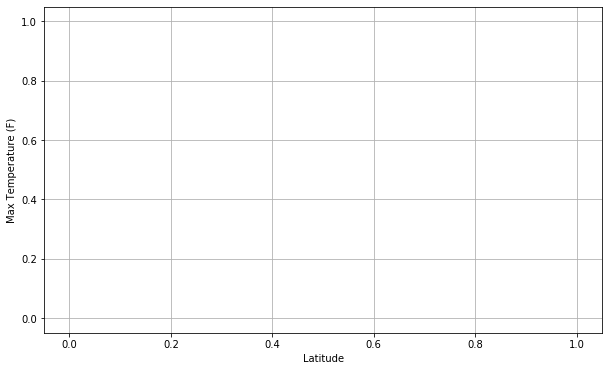

In [14]:
# Set figure size
plt.figure(figsize=(10,6))

#Plot latitude vs max temperature
plt.scatter(weather_df['Latitude'],weather_df['Max Temp'], marker = 'o',edgecolors='navy')

# Add grid, x-axis labels and y-axis labels
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Add title including date of analysis (time_format)
plt.title(f'City Latitude vs. Max Temperature ({time_format})',size=14)

# Save the Figure to folder Images
plt.savefig("Images/LATvsMAXTEMP.png")

# Show the figure
plt.show()

#### Latitude vs. Humidity Plot

NameError: name 'time_format' is not defined

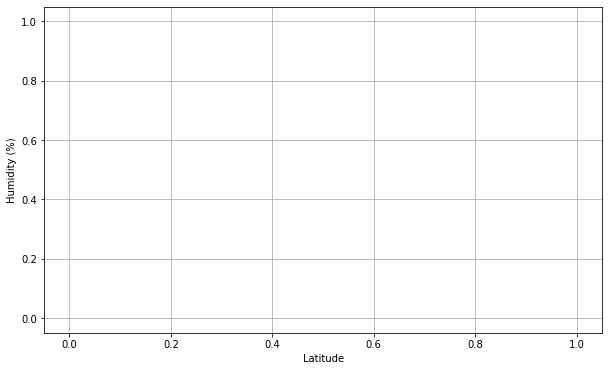

In [15]:
# Set figure size
plt.figure(figsize=(10,6))

#Plot latitude vs humidity
plt.scatter(weather_df['Latitude'],weather_df['Humidity'], marker = 'o',edgecolors='navy')

# Add grid, x-axis labels and y-axis labels
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Add title including date of analysis (time_format)
plt.title(f'City Latitude vs. Humidity ({time_format})',size=13)

# Save the Figure to folder Images
plt.savefig("Images/LATvsHUMIDITY.png")

# Show the figure
plt.show()


#### Latitude vs. Cloudiness Plot

NameError: name 'time_format' is not defined

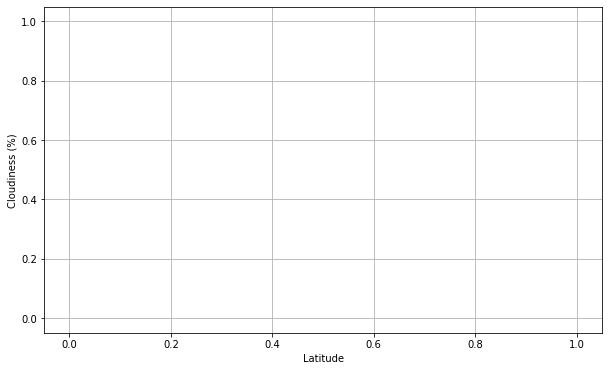

In [16]:
# Set figure size
plt.figure(figsize=(10,6))

#Plot latitude vs cloudiness (%)
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'], marker = 'o',edgecolors='navy')

# Add grid, x-axis labels and y-axis labels
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Add title including date of analysis (time_format)
plt.title(f'City Latitude vs. Cloudiness ({time_format})',size=13)

# Save the Figure to folder Images
plt.savefig("Images/LATvsCLOUDINESS.png")

# Show the figure
plt.show()


#### Latitude vs. Wind Speed Plot

NameError: name 'time_format' is not defined

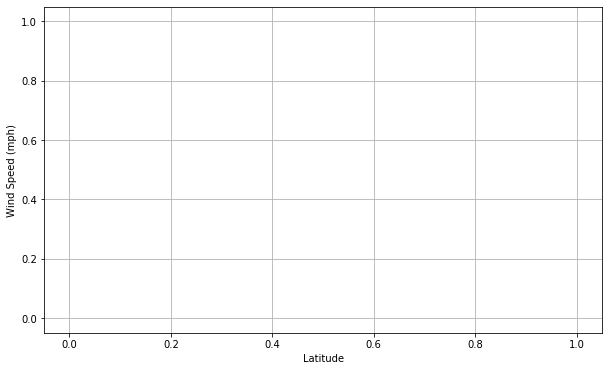

In [17]:
# Set figure size
plt.figure(figsize=(10,6))

#Plot latitude vs wind speed (mph)
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'], marker = 'o',edgecolors='navy')

# Add grid, x-axis labels and y-axis labels
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Add title including date of analysis (time_format)
plt.title(f'City Latitude vs. Wind Speed ({time_format})',size=13)

# Save the Figure to folder Images
plt.savefig("Images/LATvsWINDSPEED.png")

# Show the figure
plt.show()
